In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [1]:
import serial

In [2]:
import serial_utils

## Get the portname from the Arduino IDE

In [3]:
portname = 'COM3'

In [20]:
ser = serial.Serial(portname, 115200, timeout=1)

In [21]:
debug_line = serial_utils.Read_Line(ser)
line_str = ''.join(debug_line)
line_str

'serial echo test USB 05/01/17'

In [22]:
from matplotlib.pyplot import *
from numpy import *
import numpy, time, os
import copy

In [25]:
ser.flushInput()
ser.flushOutput()

In [26]:
serial_utils.WriteByte(ser, 2)#start new test
check_byte = serial_utils.Read_Two_Bytes(ser)
print('check_byte = %s' % check_byte)

N = 175

nvect = zeros(N,dtype=int)
v1 = arange(0,N)
v_echo = zeros_like(nvect)
msb_list = []
lsb_list = []

t0 = time.time()

for i in range(N):
    serial_utils.WriteByte(ser, 1)#new n and voltage are coming
    serial_utils.WriteInt(ser, i)
    serial_utils.WriteInt(ser, v1[i])

    nvect[i] = serial_utils.Read_Two_Bytes(ser)
    #v_echo[i] = serial_utils.Read_Two_Bytes(ser)
    v_echo[i] = serial_utils.Read_Two_Bytes_Twos_Comp(ser)

    #msb = serial_utils.Read_Byte(ser)
    #lsb = serial_utils.Read_Byte(ser)
    #msb = ser.read(1)
    #lsb = ser.read(1)
    
    nl_check = serial_utils.Read_Byte(ser)
    assert nl_check == 10, "newline problem"

    #lsb_list.append(lsb)
    #msb_list.append(msb)
    

t1 = time.time()
print('Total time = %0.4g' % (t1-t0))
dt_ave = (t1-t0)/N
print('average dt = %0.4g' % (dt_ave))

time.sleep(0.1)
serial_utils.WriteByte(ser, 3)#stop test
time.sleep(0.1)
serial_utils.WriteByte(ser, 3)#stop test

#serial_utils.Close_Serial(ser)

check_byte = 2
Total time = 1.129
average dt = 0.006452


In [27]:
neg_inds = where(v_echo < 0)[0]
v_echo[neg_inds] += 2**16

test_vect = v1**2-v_echo

if test_vect.any():
    print('some failures:')
    print(test_vect)
else:
    print('no failures')

    
t = dt_ave*nvect

data = array([t, v1, v_echo]).T

some failures:
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0 131   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0 169   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 245   0   0
   0   0   0   0 259   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0 297   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0 335   0   0   0   0   0   0]


In [28]:
nvect

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174])

In [31]:
v_echo - nvect**2

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
       -131,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0, -169,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0, -245,    0,    0,    0,    0,    0,    0, -259,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0, -297,   

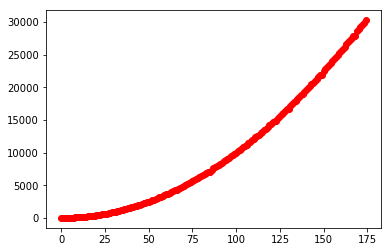

In [33]:
plt.figure()
plt.plot(nvect, v1**2, nvect, v_echo, 'ro')